# Import nltk tools

In [1468]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Switch area
SUBJECT = 'qty'
# SUBJECT_set_1 for col classify= [ 'brand', 'style', 'item', 'description', 'spec', 'width:', 'weight:', 'position', 'color_way', 'supplier', 'ref', 'qty', 'price/unit', 'unit', ]

VOCAB_SIZE = 900
TEST_SIZE = 0.1 # proportion, the size of test_set

# Wrod processing

In [1469]:
data = pd.read_csv('result/Matrix/' + SUBJECT + '_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [1470]:
data.head()

,Unnamed: 0,material,qty
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [1471]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [1472]:
data.head()

,MATERIAL_ID,material,qty
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Set the original index as Index

In [1473]:
data.set_index('MATERIAL_ID', inplace = True)

In [1474]:
data.tail()

,material,qty
MATERIAL_ID,,
3828,", 3.55', '3.5', '3.55', '3.55', '3.5', '0.82',...",0
3829,", 3.5', '3.5', '0.82', '1.6', '0.47', '0.25603...",0
3830,", 3.5', '3.5', '3.5', '0.82', '1.6', '3.3', '0...",0
3831,", 3.5', '3.345', '0.82', '0.84', '1.12', '1.1...",0
3832,", 3.67', '3.5', '3.5', '3.5', '0.82', '1.12', ...",0


## Nltk Function

In [1475]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [1476]:
nltk_convert(data.at[0, 'material'])

['scott', 'usa']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [1477]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 2.13 s, sys: 121 ms, total: 2.25 s
Wall time: 2.33 s


In [1478]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [1479]:
material_ids_ctg_1 = data[data[SUBJECT] == 1].index
material_ids_ctg_0 = data[data[SUBJECT] ==0].index

In [1480]:
material_ids_ctg_1

Int64Index([3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467,
            ...
            3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
           dtype='int64', name='MATERIAL_ID', length=191)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [1481]:
nested_list_ctg_1 = nested_list.loc[material_ids_ctg_1]

In [1482]:
nested_list_ctg_1

MATERIAL_ID
3458                                   []
3459                                   []
3460                                   []
3461                                   []
3462                                   []
                      ...                
3644                          [PER, SIDE]
3645               [PER, SIDE, PER, SIDE]
3646    [PER, SIDE, PER, SIDE, PER, SIDE]
3647               [PER, SIDE, PER, SIDE]
3648                                   []
Name: material, Length: 191, dtype: object

* by the index of doc_ids_trim

In [1483]:
nested_list_ctg_0 = nested_list.loc[material_ids_ctg_0]

In [1484]:
nested_list_ctg_0.shape[0]

3642

## Number of Distinct words
* The Ctg_1

In [1485]:
flat_list_ctg_1 =[item for sublist in nested_list_ctg_1 for item in sublist]

In [1486]:
ctg_1_words = pd.Series(flat_list_ctg_1).value_counts()

In [1487]:
ctg_1_words.shape

(45,)

* The Ctg_0

In [1488]:
flat_list_ctg_0 = [item for sublist in nested_list_ctg_0 for item in sublist]

In [1489]:
ctg_0_words = pd.Series(flat_list_ctg_0).value_counts()

In [1490]:
ctg_0_words.head()

black     2257
pocket    1741
color     1732
label     1608
zipper    1605
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (ctg_1 and ctg_0)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [1491]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [1492]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 3.09 s, sys: 93.7 ms, total: 3.19 s
Wall time: 3.2 s


* Get flat list for all words

In [1493]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [1494]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [1495]:
unique_words

black     2281
pocket    2198
tape      1897
zipper    1896
color     1873
          ... 
ra           1
pks          1
heavi        1
make         1
fab          1
Length: 1458, dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [1496]:
VOCAB_SIZE

900

In [1497]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [1498]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 black     2281
pocket    2198
tape      1897
zipper    1896
color     1873
label     1849
side      1659
number    1523
shell     1491
seam      1073
dtype: int64


## Create Vocabulary with WORD_ID

In [1499]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,black
1,pocket
2,tape
3,zipper
4,color


* Save the vocabulary

In [1500]:
vocab.to_csv('result/Trained Data/Vocabulary/'+SUBJECT+'_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [1501]:
'hangtag' in set(vocab.VOCAB_WORD)

True

## Search out the material with most token

In [1502]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 2510


In [1503]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 870


In [1504]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['nitro',
 'men',
 'jacket',
 'sampl',
 'size',
 'larg',
 'winter',
 'contractor',
 'soluna',
 'number',
 'date',
 'creat',
 'name',
 'summit',
 'packabl',
 'date',
 'revis',
 'block',
 'base',
 'powel',
 'fit',
 'mtn',
 'fit',
 'seal',
 'fulli',
 'seam',
 'tape',
 'fit',
 'regular',
 'no',
 'insul',
 'target',
 'fob',
 'colorway',
 'fabric',
 'refer',
 'number',
 'locat',
 'content',
 'refer',
 'number',
 'locat',
 'content',
 'tape',
 'refer',
 'number',
 'locat',
 'content',
 'refer',
 'number',
 'locat',
 'content',
 'men',
 'jacket',
 'sampl',
 'size',
 'larg',
 'winter',
 'contractor',
 'soluna',
 'number',
 'date',
 'creat',
 'name',
 'summit',
 'packabl',
 'date',
 'revis',
 'block',
 'base',
 'powel',
 'fit',
 'mtn',
 'fit',
 'seal',
 'fulli',
 'seam',
 'tape',
 'fit',
 'regular',
 'no',
 'insul',
 'target',
 'fob',
 'refer',
 'number',
 'locat',
 'amount',
 'zipper',
 'pull',
 'refer',
 'number',
 'locat',
 'amount',
 'trim',
 'refer',
 'number',
 'locat',
 'amount',
 'refer'

# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [1505]:
type(stemmed_nested_list)

pandas.core.series.Series

In [1506]:
stemmed_nested_list

MATERIAL_ID
0       [scott, usa]
1       [scott, usa]
2       [scott, usa]
3       [scott, usa]
4       [scott, usa]
            ...     
3828              []
3829              []
3830              []
3831              []
3832              []
Name: material, Length: 3833, dtype: object

In [1507]:
type(stemmed_nested_list.tolist())

list

In [1508]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509
0,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3829,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3830,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3831,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [1509]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data[SUBJECT],
                                                    test_size = TEST_SIZE)

In [1510]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 3449
Fraction of traning set 0.8998173754239499


In [1511]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
2960,color,x,antiqu,copper,zipper,tape,teeth,color,black,color,...,None,None,None,None,None,None,None,None,None,None
3260,tube,tube,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1017,micro,twill,insul,tape,tape,line,line,coat,tricot,tricot,...,None,None,None,None,None,None,None,None,None,None
1527,nylon,nylon,nylon,nylon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3029,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [1512]:
y_train.head()

MATERIAL_ID
2960    0
3260    0
1017    0
1527    0
3029    0
Name: qty, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [1513]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['black', 'pocket', 'tape', 'zipper', 'color', 'label', 'side', 'number',
       'shell', 'seam',
       ...
       'smoke', 'wi', 'polyestr', 'eagl', 'silicon', 'snow', 'race', 'fw',
       'pop', 'pacif'],
      dtype='object', name='VOCAB_WORD', length=900)

In [1514]:
y_train.shape[0]

3449

### Sparse Matrix Function

In [1515]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [1516]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 44.2 s, sys: 107 ms, total: 44.3 s
Wall time: 44.5 s


In [1517]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,2960,1,4
1,0,2960,1,21
2,0,2960,1,98
3,0,2960,1,36
4,0,2960,1,3
...,...,...,...,...
81845,0,2419,1,46
81846,0,2419,1,418
81847,0,2419,1,369
81848,0,2419,1,42


In [1518]:
sparse_train_df.shape

(81850, 4)

### Group by the DOC_ID

In [1519]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
0           476     0              1
            483     0              1
1           476     0              1
            483     0              1
2           476     0              1
...                              ...
3822        297     0              1
3823        477     0              1
3824        477     0              1
3825        477     0              1
3826        477     0              1

[26945 rows x 1 columns]

* Distribute the DOC_ID to each row

In [1520]:
train_grouped = train_grouped.reset_index()

In [1521]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,476,0,1
1,0,483,0,1
2,1,476,0,1
3,1,483,0,1
4,2,476,0,1
...,...,...,...,...
26940,3822,297,0,1
26941,3823,477,0,1
26942,3824,477,0,1
26943,3825,477,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [1522]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [1523]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3649,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2801,color,x,antiqu,copper,zipper,tape,color,black,color,x,...,None,None,None,None,None,None,None,None,None,None
1056,oxford,twill,insul,tape,tape,coat,tricot,mesh,leg,line,...,None,None,None,None,None,None,None,None,None,None
3492,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
605,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [1524]:
y_test.head()

MATERIAL_ID
3649    0
2801    0
1056    0
3492    1
605     0
Name: qty, dtype: int64

In [1525]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 5.02 s, sys: 13.7 ms, total: 5.03 s
Wall time: 5.06 s


In [1526]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,3,476,0,1
1,3,483,0,1
2,8,476,0,1
3,8,483,0,1
4,17,713,0,1


In [1527]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [1528]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [1529]:
TRANING_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_traning_data'

* Open it by Numpy

In [1530]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [1531]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [1532]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(2464, 902)

## Make a Full matrix function

In [1533]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [1534]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 1.34 s, sys: 20.5 ms, total: 1.36 s
Wall time: 1.22 s


In [1535]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Probability of Category_1 in train_data

In [1536]:
full_train_data.CATEGORY.size

2464

In [1537]:
full_train_data.CATEGORY.sum()

83

In [1538]:
prob_ctg_1 = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability  of ' + SUBJECT +' is', prob_ctg_1)

Probability  of qty is 0.033685064935064936


In [1539]:
prob_ctg_1

0.033685064935064936

In [1540]:
prob_ctg_1_in_train_data = pd.DataFrame({'prob_ctg_1_train_set':[prob_ctg_1]})

In [1541]:
prob_ctg_1_in_train_data.to_csv('result/Trained Data/Train_set/' + SUBJECT + '_prob_ctg_1_in_train_data')

# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [1542]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [1543]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1544]:
# full_train_features[1249].sum()

### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [1545]:
material_train_data = full_train_features.sum(axis = 1) 
material_train_data.shape # Show how many materials in train_data

(2464,)

In [1546]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
0       2
1       2
2       2
4       2
5       2
       ..
3822    1
3823    1
3824    1
3825    1
3826    1
Length: 2464, dtype: int64

* Total number of words in train_data

In [1547]:
total_words_train_data = material_train_data.sum()
total_words_train_data

81850

#### Token of ctg_1 in train_data
* Number of particular words of category 1, in train_data
* The word can be called "token"

In [1548]:
ctg_1_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
ctg_1_in_train_data.shape
# 1379 materials in train_data is fabric

(83,)

In [1549]:
ctg_1_token_in_train_data = ctg_1_in_train_data.sum()
ctg_1_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

1642

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [1550]:
ctg_0_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
ctg_0_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(2381,)

In [1551]:
ctg_0_token_in_train_data = ctg_0_in_train_data.sum()
ctg_0_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

80208

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [1552]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_train_data / ctg_1_in_train_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_train_data / ctg_0_in_train_data.shape[0]))

Average nr of words in ctg_1 20
Average nr of words in ctg_0 34


In [1553]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - ctg_1_in_train_data.shape[0] - ctg_0_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of ctg_1
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [1554]:
ctg_1_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [1555]:
ctg_1_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3548,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3549,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3550,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3644,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3645,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [1556]:
ctg_0_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [1557]:
ctg_0_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [1558]:
summed_ctg_1_tokens_in_train_data = ctg_1_full_train_features.sum(axis = 0) + 1

In [1559]:
summed_ctg_1_tokens_in_train_data

0      1
1      6
2      1
3      1
4      1
      ..
895    1
896    1
897    1
898    1
899    1
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [1560]:
summed_ctg_0_tokens_in_train_data = ctg_0_full_train_features.sum(axis = 0) + 1

In [1561]:
summed_ctg_0_tokens_in_train_data

0      2086
1      2009
2      1721
3      1708
4      1606
       ... 
895       4
896       6
897       6
898       5
899       6
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | ctg_1 )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [1562]:
prob_tokens_ctg_1_train_set = summed_ctg_1_tokens_in_train_data / (ctg_1_token_in_train_data + VOCAB_SIZE)

In [1563]:
ctg_1_token_in_train_data

1642

In [1564]:
prob_tokens_ctg_1_train_set

0      0.000393
1      0.002360
2      0.000393
3      0.000393
4      0.000393
         ...   
895    0.000393
896    0.000393
897    0.000393
898    0.000393
899    0.000393
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

In [1565]:
prob_tokens_ctg_0_train_set = summed_ctg_0_tokens_in_train_data / (ctg_0_token_in_train_data + VOCAB_SIZE)

In [1566]:
prob_tokens_ctg_0_train_set

0      0.025719
1      0.024769
2      0.021219
3      0.021058
4      0.019801
         ...   
895    0.000049
896    0.000074
897    0.000074
898    0.000062
899    0.000074
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [1567]:
prob_tokens_ctg_0_train_set.sum()

1.0

* Test for the prob

In [1568]:
check = prob_tokens_ctg_1_train_set[196] > prob_tokens_ctg_0_train_set[196]
check

False

### Probability of tokens in train_data
* ### P (Token)

In [1569]:
prob_tokens_all_train_set = full_train_features.sum(axis = 0) / total_words_train_data

In [1570]:
prob_tokens_all_train_set

0      0.025473
1      0.024594
2      0.021014
3      0.020855
4      0.019609
         ...   
895    0.000037
896    0.000061
897    0.000061
898    0.000049
899    0.000061
Length: 900, dtype: float64

In [1571]:
prob_tokens_all_train_set.sum()

0.9999999999999999

### Save the trained Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [1572]:
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_1_in_train_data' ,prob_tokens_ctg_1_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_0_in_train_data', prob_tokens_ctg_0_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | ctg_1 ), P (Token | ctg_0 ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [1573]:
TEST_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [1574]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [1575]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 316 ms, sys: 5.09 ms, total: 321 ms
Wall time: 335 ms


In [1576]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### Ctg_1

In [1577]:
full_test_data.CATEGORY.size

261

In [1578]:
full_test_data.CATEGORY.sum()

10

In [1579]:
prob_ctg_1_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of ctg_1 in test_set', prob_ctg_1_test_data)

Probability of ctg_1 in test_set 0.038314176245210725


### Full Features of test_set

In [1580]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [1581]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [1582]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
3     2
8     2
17    1
43    1
54    1
dtype: int64

* Total number of words in test_data

In [1583]:
total_words_test_data = material_test_data.sum()
total_words_test_data

9261

#### Token of ctg_1 in test_data

In [1584]:
ctg_1_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
ctg_1_in_test_data.shape

(10,)

In [1585]:
ctg_1_token_in_test_data = ctg_1_in_test_data.sum()
ctg_1_token_in_test_data

298

#### Token of ctg_0 in test_data

In [1586]:
ctg_0_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
ctg_0_in_test_data.shape

(251,)

In [1587]:
ctg_0_token_in_test_data = ctg_0_in_test_data.sum()
ctg_0_token_in_test_data

8963

#### Average number of words in fabric and trim in test_data

In [1588]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_test_data / ctg_1_in_test_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_test_data / ctg_0_in_test_data.shape[0]))

Average nr of words in ctg_1 30
Average nr of words in ctg_0 36


### Frequency of tokens in test_data
* Full feature of ctg_1 in test_data

In [1589]:
ctg_1_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
ctg_1_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3551,0,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3553,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3563,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3568,0,0,0,0,0,0,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3600,0,0,0,0,0,0,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3602,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3621,0,1,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3624,0,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3628,0,0,0,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of ctg_0 in test_data

In [1590]:
ctg_0_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
ctg_0_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in ctg_1 in test_data

In [1591]:
summed_ctg_1_tokens_in_test_data = ctg_1_full_test_features.sum(axis = 0) +1 
summed_ctg_1_tokens_in_test_data

0      1
1      2
2      1
3      1
4      1
      ..
895    1
896    1
897    1
898    1
899    1
Length: 900, dtype: int64

#### Frequency of tokens in ctg_0 in test_data

In [1592]:
summed_ctg_0_tokens_in_test_data = ctg_0_full_test_features.sum(axis = 0) +1 
summed_ctg_0_tokens_in_test_data

0      197
1      185
2      178
3      190
4      269
      ... 
895      3
896      1
897      1
898      2
899      1
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | ctg_1 )

In [1593]:
prob_tokens_ctg_1_test_set = summed_ctg_1_tokens_in_test_data / (ctg_1_token_in_test_data + VOCAB_SIZE)

In [1594]:
prob_tokens_ctg_1_test_set

0      0.000835
1      0.001669
2      0.000835
3      0.000835
4      0.000835
         ...   
895    0.000835
896    0.000835
897    0.000835
898    0.000835
899    0.000835
Length: 900, dtype: float64

* ### P( Token | ctg_0 )

In [1595]:
prob_tokens_ctg_0_test_set = summed_ctg_0_tokens_in_test_data / (ctg_0_token_in_test_data + VOCAB_SIZE)

In [1596]:
prob_tokens_ctg_0_test_set

0      0.019974
1      0.018757
2      0.018047
3      0.019264
4      0.027274
         ...   
895    0.000304
896    0.000101
897    0.000101
898    0.000203
899    0.000101
Length: 900, dtype: float64

* ### P( Token )

In [1597]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [1598]:
prob_tokens_all_test_set

0      0.021164
1      0.019976
2      0.019112
3      0.020408
4      0.028939
         ...   
895    0.000216
896    0.000000
897    0.000000
898    0.000108
899    0.000000
Length: 900, dtype: float64

In [1599]:
prob_tokens_all_test_set.sum()

1.0

### Save the test Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [1600]:
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_1_in_test_data' ,prob_tokens_ctg_1_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_0_in_test_data', prob_tokens_ctg_0_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [1601]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [1602]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
3       0
8       0
17      0
43      0
54      0
       ..
3787    0
3788    0
3794    0
3798    0
3807    0
Name: CATEGORY, Length: 261, dtype: int64

### Probability of ctg_1 of Test_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [1603]:
prob_tokens_ctg_1_train_set

0      0.000393
1      0.002360
2      0.000393
3      0.000393
4      0.000393
         ...   
895    0.000393
896    0.000393
897    0.000393
898    0.000393
899    0.000393
Length: 900, dtype: float64

In [1604]:
joint_pty = full_test_features.dot(prob_tokens_ctg_1_train_set)
joint_pty

MATERIAL_ID
3       0.000787
8       0.000787
17      0.000393
43      0.000393
54      0.000393
          ...   
3787    0.001967
3788    0.001967
3794    0.001967
3798    0.001967
3807    0.001967
Length: 261, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( ctg_1 | documents )  = 
P( documentsl | ctg_1 ) * P( ctg_1) / P( document )


# Joint probability in log format
* Ctg_1 joint prob in log format

In [1605]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_ctg_1) 

In [1606]:
joint_log_ctg_1[:5]

MATERIAL_ID
3    NaN
8    NaN
17   NaN
43   NaN
54   NaN
dtype: float64

* Ctg_0 joint prob in log format

In [1607]:
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_ctg_1) 

In [1608]:
joint_log_ctg_0[:5]

MATERIAL_ID
3    NaN
8    NaN
17   NaN
43   NaN
54   NaN
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [1609]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set)) + np.log(prob_ctg_1)
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set)) + np.log(1-prob_ctg_1)

# Prediction

In [1610]:
prediction = joint_log_ctg_1 > joint_log_ctg_0

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [1611]:
joint_log_ctg_1.min()

-13073.081657059878

In [1612]:
prediction[-5:]*1

MATERIAL_ID
3787    0
3788    0
3794    0
3798    0
3807    0
dtype: int64

In [1613]:
full_test_target[-5:]

MATERIAL_ID
3787    0
3788    0
3794    0
3798    0
3807    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [1614]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 258
Does classfied incorrectly 3


### Accuracy %

In [1615]:
correct_materials / len(full_test_features)

0.9885057471264368

# Decision Boundary
## Visualizing the results

In [1616]:
yaxis_label = 'P(X | ' + SUBJECT + ')'
xaxis_label = 'P(X | Others)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_ctg_1, 
                           yaxis_label: joint_log_ctg_0, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

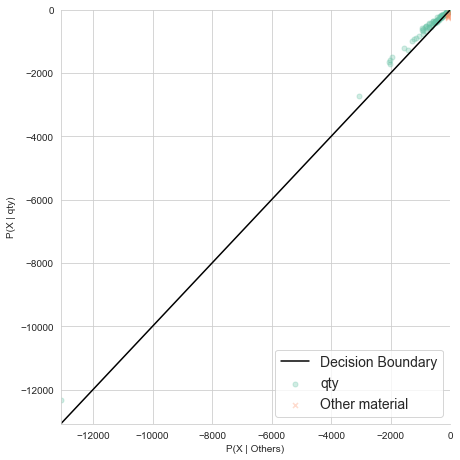

In [1617]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, height = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.3, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'Set2' )

plt.xlim([joint_log_ctg_1.min() - 10, 1])
plt.ylim([joint_log_ctg_1.min() - 10, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', SUBJECT , 'Other material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [1618]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([248,  13]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [1619]:
true_pos = (y_test == 1)&(prediction == 1)

In [1620]:
true_pos.sum()

10

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [1621]:
true_neg = (y_test == 0)&(prediction ==0)

In [1622]:
true_neg.sum()

248

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [1623]:
false_pos = (y_test == 0)&(prediction ==1)

In [1624]:
false_pos.sum()

3

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [1625]:
false_neg = (y_test == 1)&(prediction == 0)

In [1626]:
false_neg.sum()

0

In [1627]:
(y_test == 1).sum()

21

# Recall Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [1628]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 47.62%


# Precision Score
* It tells how precisely the model predicting.

In [1629]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.769


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [1630]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.59
